In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor

In [34]:
df = pd.read_csv('dataset3.0.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns = ['video_id'])
df = df.drop(columns = ['daily_view_classification'])
df = df.drop(columns = ['daily_likes_normal'])
df = df.drop(columns = ['daily_dislikes_normal'])
df = df.drop(columns = ['daily_comment_count_normal'])
df = df.drop(columns = ['category_of_title_length'])
df = df.drop(columns = ['tags_length_category'])
df = df.drop(columns = ['stop_words_count_title_normal'])
df = df.drop(columns = ['sub_date'])

y = df.daily_views.values
y = np.log(y+1)
X = df.drop(columns = ['daily_views'])
X = X.values

In [35]:
regressor = DecisionTreeRegressor(max_depth = 5,random_state=0)
cv_results = cross_validate(regressor, X, y, cv=10,scoring='r2',return_train_score=False)
cv_results['test_score']

array([ 0.22672435,  0.20515676,  0.12878384,  0.2046397 ,  0.09714622,
        0.12251178, -0.00563063,  0.0432082 , -0.04325167, -0.23583847])

In [43]:
np.mean(cv_results['test_score'])

0.07434500740913404

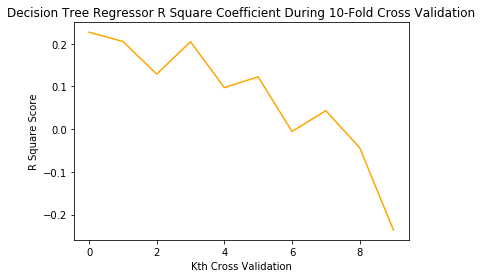

In [42]:
fig = plt.figure()
plt.plot(cv_results['test_score'], color = 'orange')
plt.xlabel('Kth Cross Validation')
plt.ylabel('R Square Score')
plt.title('Decision Tree Regressor R Square Coefficient During 10-Fold Cross Validation')
plt.show()
fig.savefig('Decision_Tree_R^2.png',bbox_inches='tight')

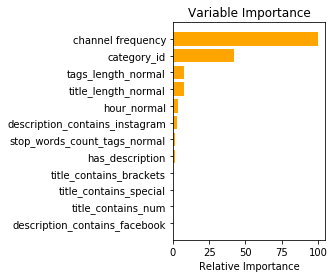

In [36]:
regressor.fit(X, y)
X = df.drop(columns = ['daily_views'])
y = df.daily_views
fig = plt.figure()
feature_importance = regressor.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center', color = 'orange')

plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
fig.savefig('Decision_Tree.png',bbox_inches='tight')

In [29]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(regressor, filled=True, rounded=True,out_file=None, feature_names=X.columns, special_characters=True)  


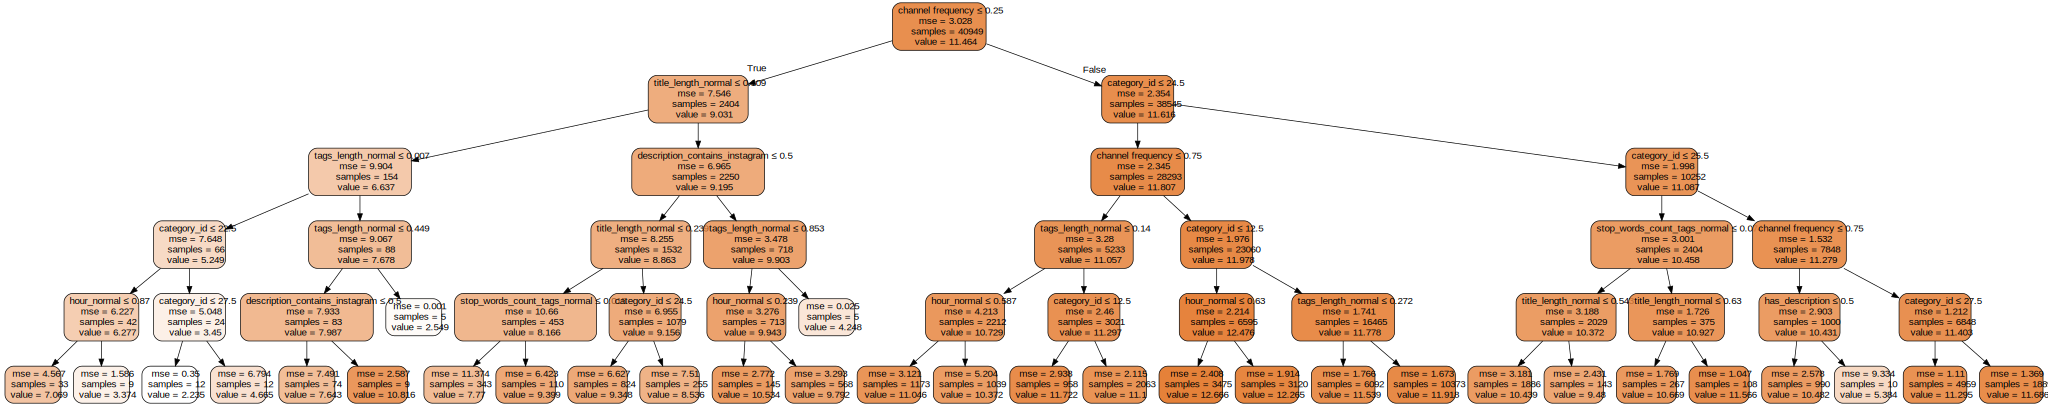

In [39]:
graph = graphviz.Source(dot_data)
colors = ('turquoise', 'orange')

#graph.write_png('tree.png')
graph

In [41]:
graph.render("DecisionTree") 

'DecisionTree.pdf'

In [45]:
regressor.score(X,y)

-0.1500847188968013

In [46]:
df.shape[0]

40949